In [48]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests
import pickle

In [49]:
sp500_tickers = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'TSLA', 'META', 'BRK.B', 'V', 'JPM', 'UNH', 'HD', 'PYPL', 'DIS', 'MA', 'PG',
    'VZ', 'NFLX', 'INTC', 'KO', 'PEP', 'BA', 'XOM', 'CVX', 'CSCO', 'WMT', 'T', 'MCD', 'ORCL', 'CAT', 'MRK', 'COST',
    'GE', 'BABA', 'ABBV', 'ADBE', 'AXP', 'CRM', 'AMGN', 'INTU', 'AMT', 'NKE', 'GS', 'WBA', 'SBUX', 'CSX', 'LMT', 'MDT', 'GS',
    'SPGI', 'BIIB', 'LUV', 'UNP', 'ISRG', 'CI', 'CVS', 'TMO', 'HON', 'LRCX', 'SHW', 'RTX', 'MMM', 'BKNG', 'ITW', 'FISV', 'MU',
    'QCOM', 'CHTR', 'STZ', 'TSCO', 'F', 'DE', 'NEE', 'MS', 'ZTS', 'WFC', 'PLD', 'AON', 'BMY', 'MMC', 'FIS', 'KHC', 'SLB', 'APD',
    'MDLZ', 'CHD', 'HUM', 'AIG', 'EL', 'SYK', 'HCA', 'DUK', 'ALL', 'C', 'OXY', 'HPE', 'SPG', 'SYY', 'VLO', 'ES', 'VMC', 'FTNT',
    'DHR', 'EOG', 'IT', 'AFL', 'NOC', 'COP', 'GILD', 'VRTX', 'WDC', 'MSCI', 'ADP', 'EXC', 'FANG', 'ZBH', 'CTSH', 'NEM', 'LHX',
    'DOW', 'BKR', 'APTV', 'TDG', 'CHKP', 'KMB', 'IQV', 'PFE', 'MU', 'BIIB', 'RMD', 'WEC', 'VFC', 'CME', 'LULU', 'MCK', 'ROST',
    'DG', 'O', 'TGT', 'SWKS', 'TROW', 'PKI', 'AEP', 'PEP', 'STT', 'MCO', 'AIZ', 'DHI', 'CTAS', 'SPGI', 'ADSK', 'FSLR', 'HIG',
    'CSX', 'NUE', 'TMUS', 'FTV', 'EXPD', 'BAX', 'MTD', 'SWK', 'ETN', 'MMC', 'FCX', 'KSU', 'PSX', 'WMT', 'RSG', 'LNC', 'PLUG',
    'TWTR', 'SQ', 'GOOG', 'MELI', 'DOCU', 'SPOT', 'BIDU', 'UBER', 'LYFT', 'PINS', 'SNAP', 'SQ', 'FSLR', 'SPLK', 'NVDA', 'PYPL',
    'RNG', 'VEEV', 'ZS', 'ZM', 'DOCU', 'MDB', 'PINS', 'COST', 'NTES', 'ROKU', 'INTC', 'COST', 'MRNA', 'VEEV', 'SHOP', 'FVRR',
    'WBA', 'NKE', 'TMO', 'IDXX', 'SWKS', 'MCD', 'AEP', 'AMT', 'EXC', 'KLAC', 'AON', 'VRTX', 'LULU', 'ZBH', 'HCA', 'FISV',
    'TGT', 'MU', 'AMT', 'UNP', 'CME', 'VFC', 'SYY', 'SYK', 'CVS', 'SBUX', 'PFE', 'TROW', 'NEE', 'SPLK', 'FIS', 'FANG', 'PNC',
    'TXN', 'CSCO', 'TMO', 'PGR', 'AMGN', 'SHOP', 'V', 'KMB', 'ROST', 'DXC', 'TAP', 'IDXX', 'BAX', 'LMT', 'RMD', 'ITW', 'RSG',
    'REGN', 'COST', 'LMT', 'DHR', 'JPM', 'C', 'LUV', 'HUM', 'APD', 'MS', 'HCA', 'WDC', 'ABT', 'COST', 'AMZN', 'MA', 'MSFT', 'VZ',
    'PFE', 'WMT', 'BMY', 'ZTS', 'GD', 'WFC', 'CHTR', 'GILD', 'FIS', 'ZBH', 'BIIB', 'LOW', 'NEE', 'VEEV', 'SWK', 'BA', 'MSCI',
    'AVGO', 'GS', 'MU', 'UNH', 'DE', 'KHC', 'EXC', 'XOM', 'PYPL', 'LHX', 'LULU', 'CVS', 'GE', 'DOW', 'BABA', 'MDT', 'AAPL',
    'HCA', 'BA', 'BAX', 'SBUX', 'NOC', 'LLY', 'ROKU', 'CHKP', 'SNAP', 'WEC', 'EL', 'COF', 'WMT', 'ZBH', 'PEP', 'EXPD', 'PLD',
    'SPGI', 'MRNA', 'AMGN', 'HD', 'INTC', 'BIIB', 'ORCL', 'PG', 'CME', 'FCX', 'ALGN', 'MMM', 'V', 'BMY', 'STZ', 'DHR', 'VMC',
    'COP', 'NTES', 'RTX', 'KO', 'GE', 'JNJ', 'AVGO', 'NSC', 'EOG', 'GPN', 'ADP', 'SYY', 'NEE', 'COST', 'SPGI', 'RSG', 'DLR',
    'BKR', 'SPLK', 'PLD', 'VFC', 'TMO', 'LMT', 'EOG', 'CVS', 'NEM', 'MRK', 'AMGN', 'GOOG', 'CAT', 'AIG', 'CVX', 'CVS', 'AIG',
    'TROW', 'CSX', 'MMC', 'RMD', 'HON', 'ZTS', 'AXP', 'T', 'ADSK', 'FTV', 'LHX', 'MSCI', 'PFE', 'DXC', 'LULU', 'PG', 'AMT',
    'BAX', 'CSCO', 'HCA', 'DIS', 'VZ', 'IQV', 'EXC', 'AXP', 'REGN', 'CTAS', 'WEC', 'FISV', 'UNP', 'PEP', 'VLO', 'NKE', 'TRV',
    'GE', 'NUE', 'NEE', 'INTC', 'ALXN', 'AON', 'IDXX', 'AAPL', 'WMT', 'TMO', 'MDT', 'HON', 'XOM', 'LMT', 'SBUX', 'MMM', 'KMB',
    'APD', 'WDC', 'MSCI', 'ZTS', 'KHC', 'GS', 'AIG', 'BMY', 'PYPL', 'WFC', 'LUV', 'PG', 'AMGN', 'ZBH', 'NVDA', 'TGT', 'CRM'
]

In [50]:
# data = yf.download(sp500_tickers, start='2000-01-01', end='2025-04-01', auto_adjust=True)

# with open('/content/drive/MyDrive/data_Multilayer spillover with ML/data_2000_20250401_yfinance.pkl', 'wb') as f:
#     pickle.dump(data, f)

with open('/content/drive/MyDrive/data_Multilayer spillover with ML/data_2000_20250401_yfinance.pkl', 'rb') as file:
    data = pickle.load(file)

In [51]:
df_sp500_price = data['Close'].dropna(axis=1).dropna()

In [52]:
df_sp500_return = data['Close'].dropna(axis=1).dropna().pct_change().dropna()

In [53]:
df_sp500_tmp_close = data['Close']
df_sp500_tmp_volume = data['Volume']

In [54]:
df_sp500_tradingval_tmp = df_sp500_tmp_close * df_sp500_tmp_volume
df_sp500_tradingval = df_sp500_tradingval_tmp.dropna(axis=1).dropna()

In [55]:
layers = [df_sp500_price.head(10), df_sp500_return.head(10), df_sp500_tradingval.head(10)]

# `granger_causality_all_pairs()`
Granger test has been written for find relation between securities (nodes) in each layer.

In [56]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
from joblib import Parallel, delayed
from tqdm import tqdm
import pandas as pd

def granger_causality_all_pairs(df, max_lag=[1], num_threads=8):
    cols = df.columns
    num_columns = len(cols)
    p_values = np.zeros((num_columns, num_columns))

    # Function to process each pair of columns
    def process_pair(i, j):
        try:
            result = grangercausalitytests(df[[df.columns[i], df.columns[j]]], max_lag, verbose=False)
            return (i, j, result[1][0]['ssr_chi2test'][1])  # Return the pair and p-value
        except Exception as e:
            print(f" ======================== Exception ======================== ")
            print(f"Failed pair: {i}, {j}")
            print(f"Data:\n{df[[df.columns[i], df.columns[j]]].head()}")
            print(f"Error: {e}")
            return (i, j, None)  # Return None for failed pair

    # Create a list of tasks (i, j) pairs to process in parallel
    tasks = [(i, j) for i in range(num_columns) for j in range(num_columns) if i != j]

    # Use joblib to parallelize the processing of pairs
    results = Parallel(n_jobs=num_threads)(delayed(process_pair)(i, j) for i, j in tqdm(tasks, desc="Processing Pairs", total=len(tasks)))

    # Store the results in the p_values matrix
    for i, j, p_value in results:
        if p_value is not None:
            p_values[i, j] = p_value

    # Convert the p_values matrix into a DataFrame with proper column names
    p_values_df = pd.DataFrame(p_values, columns=cols, index=cols)

    return p_values_df


**Sliding window is incrementing with 30 days steps and 100 days as window length**

This part implements a sliding window technique on time-series data, where the window slides forward in increments of 30 days. Each window represents a 100-day span, allowing for efficient processing and analysis of data in overlapping segments.

In [57]:
import time

def rolling_window_on_data(df):
  for unit in np.arange(step=30,stop=len(df)):
    window = df.iloc[unit:unit+100]
    maxx = window.index.max()

    # Cut boundry before loss data in length of window
    if maxx == np.datetime64('2025-03-31 00:00:00'): break
    yield window

This part trying to calculate granger causality and save them with determined frequency in a folder in google drive.

In [63]:
layer0_t_evolution = []

# for i,layer_0_t in enumerate(rolling_window_on_data(df_sp500_return)):
#   if i>=206:
#     print(i,layer_0_t.index.min(), layer_0_t.index.max(), sep=',')
#     p_values_matrix = granger_causality_all_pairs(layer_0_t, max_lag=[1])
#     layer0_t_evolution.append(p_values_matrix)

#     print(f'step: {len(layer0_t_evolution)}')
#     print(f'elements: {len(layer0_t_evolution[len(layer0_t_evolution)-1])}')

#     if i%5 == 0:
#       with open(f'/content/drive/MyDrive/data_Multilayer spillover with ML/layers/layer_{i}_times_evolution.pkl', 'wb') as f:
#         pickle.dump(layer0_t_evolution, f)


In [59]:
with open('/content/drive/MyDrive/data_Multilayer spillover with ML/layers/layer_latest_206_208_times_evolution.pkl', 'rb') as file:
    temp101 = pickle.load(file)

with open('/content/drive/MyDrive/data_Multilayer spillover with ML/layers/layer_50_times_evolution.pkl', 'rb') as file:
    temp102 = pickle.load(file)

with open('/content/drive/MyDrive/data_Multilayer spillover with ML/layers/layer_205_times_evolution.pkl', 'rb') as file:
    temp103 = pickle.load(file)

with open('/content/drive/MyDrive/data_Multilayer spillover with ML/layers/layer_200_times_evolution.pkl', 'rb') as file:
    temp104 = pickle.load(file)

# Collected
temp1001 = temp101 + temp102 + temp103 + temp104

# with open(f'/content/drive/MyDrive/data_Multilayer spillover with ML/layers/layer1/sp500_return_times_209_evolution.pkl', 'wb') as f:
#   pickle.dump(temp1001, f)

In [105]:
sum_p_values = []

for state_t in temp1001:
  sum_p_values.append(state_t.to_numpy().flatten().mean())

sum_p_values = np.array(sum_p_values)
sum_p_values = sum_p_values/sum_p_values.max()

app = []

for hhhh in rolling_window_on_data(df_sp500_return):
  app.append(hhhh['AAPL'].to_numpy().mean())

app = np.array(app)
app = app/app.max()


correlation coeff: [[1.         0.10247349]
 [0.10247349 1.        ]]


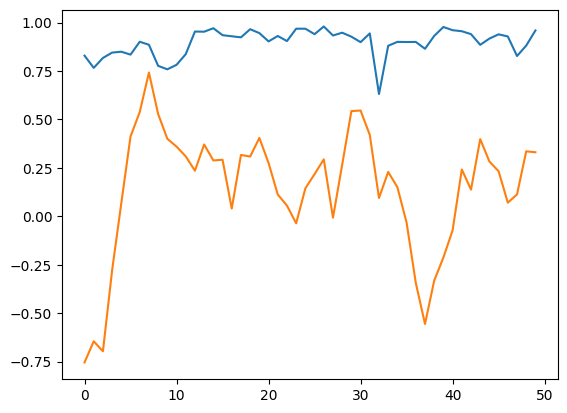

In [111]:
import matplotlib.pyplot as plt

plt.plot(sum_p_values[70:120])
plt.plot(app[70:120])

print(f"correlation coeff: {np.corrcoef(sum_p_values, app)}")

In [ ]:
# with open(f'/content/drive/MyDrive/data_Multilayer spillover with ML/layers/layer_latest_206_208_times_evolution.pkl', 'wb') as f:
#         pickle.dump(layer0_t_evolution, f)

In [ ]:
pd.DataFrame(layer0_t_evolution[0])

Ticker,AAPL,ABT,ADBE,ADP,ADSK,AEP,AFL,AIG,ALL,AMGN,...,VLO,VMC,VRTX,VZ,WBA,WDC,WEC,WFC,WMT,XOM
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,0.000000,0.543027,0.433362,0.911505,0.228693,0.333106,0.806361,0.466906,0.961621,0.028969,...,0.396141,0.974643,0.687761,0.533000,0.674304,0.893770,0.683034,0.781714,0.401094,0.287634
ABT,0.535941,0.000000,0.863703,0.117832,0.740004,0.833564,0.796057,0.805603,0.443940,0.705357,...,0.804464,0.130933,0.555584,0.922538,0.845187,0.156948,0.581003,0.562824,0.614718,0.101669
ADBE,0.237663,0.603176,0.000000,0.373017,0.776521,0.866960,0.283020,0.124139,0.226816,0.875703,...,0.556608,0.650669,0.211636,0.198646,0.713153,0.685979,0.252895,0.968453,0.028528,0.833173
ADP,0.275323,0.585288,0.590722,0.000000,0.859300,0.403394,0.600623,0.252735,0.909241,0.446752,...,0.092548,0.981996,0.923910,0.005621,0.051006,0.376203,0.336722,0.605390,0.005743,0.317658
ADSK,0.643455,0.588708,0.075879,0.613837,0.000000,0.759616,0.555438,0.147564,0.984209,0.692436,...,0.425036,0.726827,0.364196,0.229710,0.523804,0.900297,0.697917,0.992619,0.578325,0.703052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WDC,0.688840,0.027547,0.427702,0.152467,0.426581,0.528732,0.681753,0.225473,0.902195,0.396651,...,0.794373,0.103267,0.802050,0.911858,0.545579,0.000000,0.029852,0.000706,0.210813,0.287754
WEC,0.777282,0.293989,0.560337,0.304193,0.667225,0.815177,0.205843,0.612610,0.023491,0.579747,...,0.012422,0.363630,0.212116,0.032292,0.819956,0.281491,0.000000,0.633315,0.364989,0.757736
WFC,0.740850,0.558134,0.215033,0.805111,0.126614,0.760631,0.232699,0.748236,0.654169,0.316167,...,0.880235,0.624145,0.289681,0.922929,0.424943,0.847843,0.176749,0.000000,0.573032,0.215722


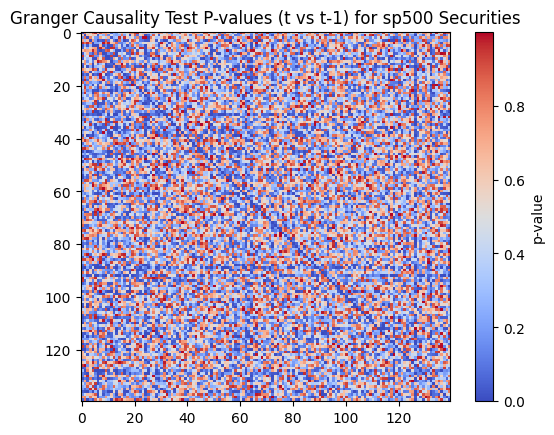

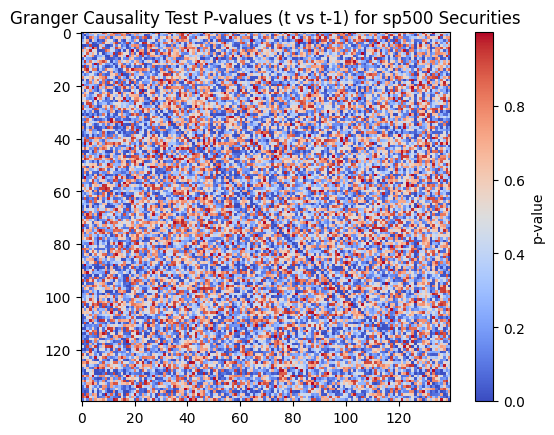

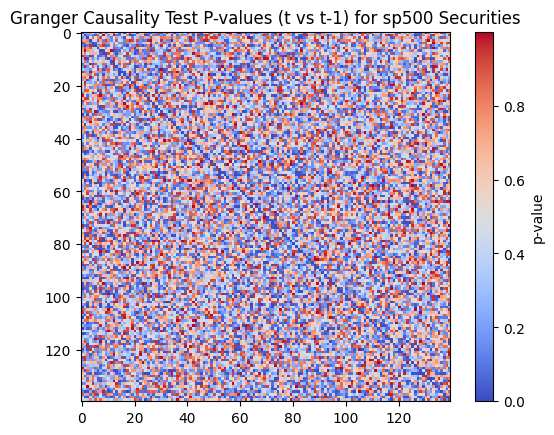

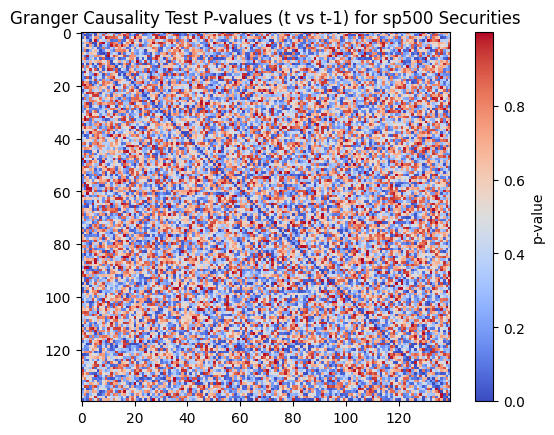

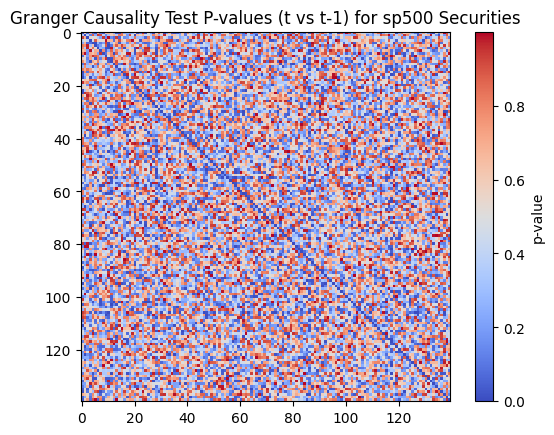

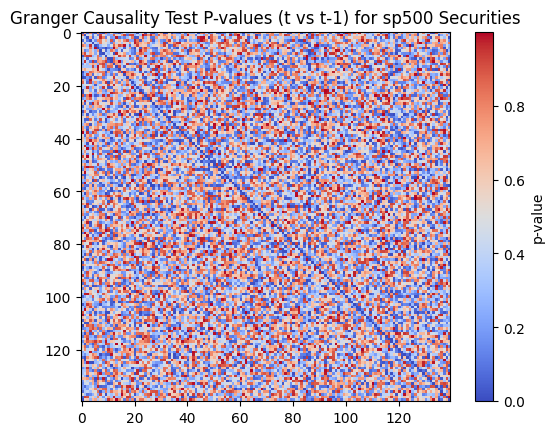

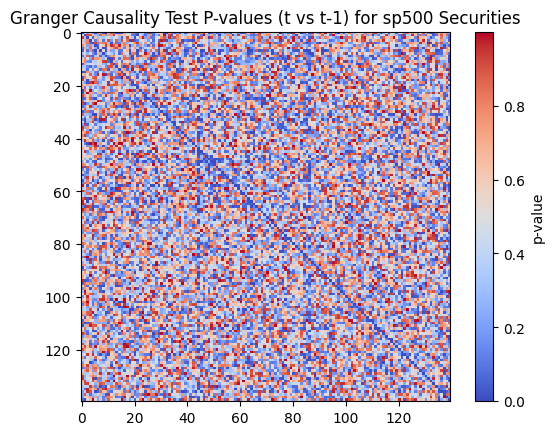

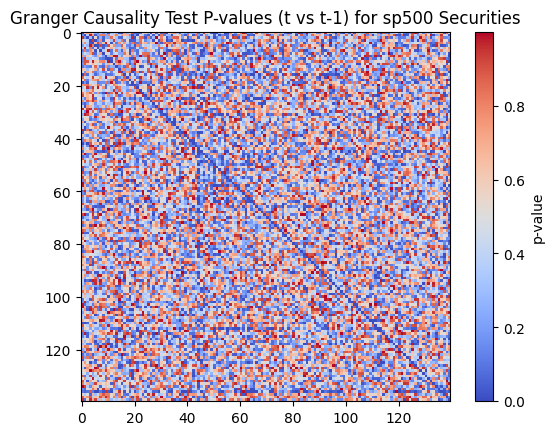

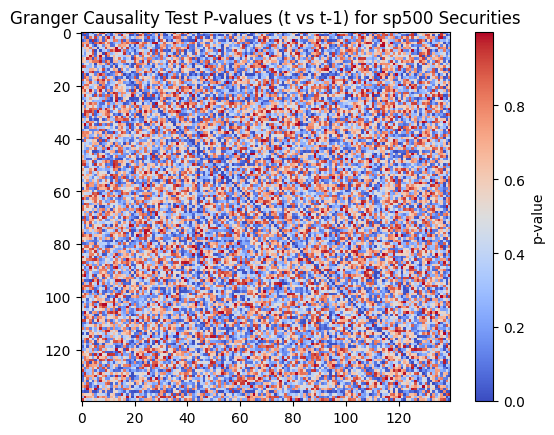

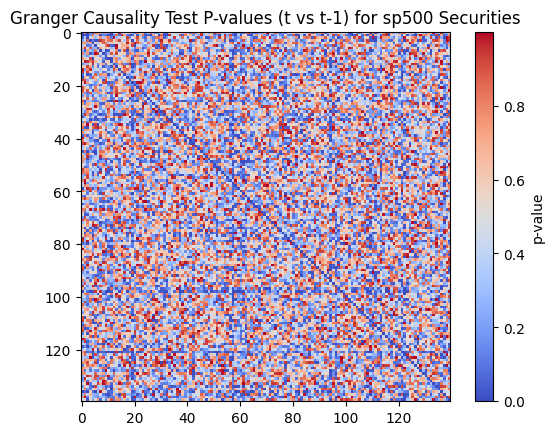

In [ ]:
del plt

import matplotlib.pyplot as plt

for jj in layer0_t_evolution:
  plt.imshow(jj, cmap='coolwarm', interpolation='none')
  plt.colorbar(label='p-value')
  plt.title("Granger Causality Test P-values (t vs t-1) for sp500 Securities")

  # Show the plot
  plt.show()

In [ ]:
# for jjj in rolling_window_on_data(df_sp500_price):
#   # print(jjj.min(), jjj.max())
#   # time.sleep(5)


In [ ]:
layers_p_val = []
# for layer in layers:
#   p_values_matrix = granger_causality_all_pairs(layer, max_lag=1)
#   layers_p_val.append(p_values_matrix)


In [ ]:
# with open('/content/drive/MyDrive/data_Multilayer spillover with ML/data_layers_p_val.pkl', 'wb') as f:
#     pickle.dump(layers_p_val, f)

In [ ]:
with open('/content/drive/MyDrive/data_Multilayer spillover with ML/data_layers_p_val.pkl', 'rb') as file:
    layers_p_val = pickle.load(file)

In [ ]:
# # Plotting
# plt.imshow(p_values_matrix, cmap='coolwarm', interpolation='none')
# plt.colorbar(label='p-value')
# plt.title("Granger Causality Test P-values (t vs t-1) for NASDAQ-100 Securities")

# # Show the plot
# plt.tight_layout()

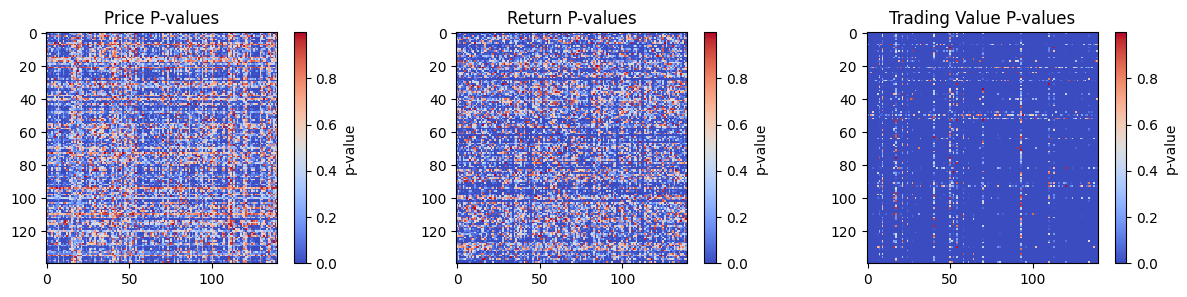

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15, 3))

axs[0].imshow(layers_p_val[0], cmap='coolwarm', interpolation='none')
axs[0].set_title('Price P-values')
fig.colorbar(axs[0].imshow(layers_p_val[0], cmap='coolwarm', interpolation='none'), ax=axs[0], label='p-value')


axs[1].imshow(layers_p_val[1], cmap='coolwarm', interpolation='none')
axs[1].set_title('Return P-values')
fig.colorbar(axs[1].imshow(layers_p_val[1], cmap='coolwarm', interpolation='none'), ax=axs[1], label='p-value')


axs[2].imshow(layers_p_val[2], cmap='coolwarm', interpolation='none')
axs[2].set_title('Trading Value P-values')
fig.colorbar(axs[2].imshow(layers_p_val[2], cmap='coolwarm', interpolation='none'), ax=axs[2], label='p-value')


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from joblib import Parallel, delayed
import pandas as pd
from tqdm import tqdm  # Import tqdm for progress bar

def build_weighted_adjacency_matrix_rf(target_df, feature_df, lag=1, n_estimators=100, random_state=42, n_jobs=-1):
    """
    Build a weighted adjacency matrix using Random Forest feature importances as weights.

    Parameters:
    - target_df: DataFrame of prices (targets)
    - feature_df: DataFrame of volumes (features)
    - lag: How many time steps to shift feature_df
    - n_estimators: Number of trees in the forest
    - random_state: Random seed for reproducibility
    - n_jobs: Number of jobs to run in parallel (use -1 for all cores)

    Returns:
    - weighted_adjacency_df: DataFrame (targets x features), weighted by feature importance
    """
    feature_df_shifted = feature_df.shift(lag)

    # Function to calculate feature importances for each target column
    def compute_feature_importances(target_col):
        df_combined = pd.concat([feature_df_shifted, target_df[target_col]], axis=1).dropna()
        X = df_combined[feature_df.columns]
        y = df_combined[target_col]

        rf = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
        rf.fit(X, y)
        return pd.Series(rf.feature_importances_, index=X.columns)

    # Set up tqdm with joblib's Parallel to show progress bar
    # The `tqdm` wraps the iterator to display progress for parallel execution
    adjacency_data = Parallel(n_jobs=n_jobs)(
        delayed(compute_feature_importances)(target_col)
        for target_col in tqdm(target_df.columns, desc="Processing target columns")
    )

    # Create weighted adjacency matrix
    weighted_adjacency_df = pd.DataFrame(adjacency_data, index=target_df.columns, columns=feature_df.columns)
    print(weighted_adjacency_df)
    return weighted_adjacency_df


In [ ]:
df_sp500_tradingval.columns = [col + '_tradingval' for col in df_sp500_tradingval.columns]
df_sp500_price.columns = [col + '_price' for col in df_sp500_price.columns]


# result = build_weighted_adjacency_matrix_rf(df_sp500_price[df_sp500_price.columns[0:100]], \
#                                             df_sp500_tradingval[df_sp500_tradingval.columns[0:100]], \
#                                             lag=1, \
#                                             n_estimators=100, \
#                                             random_state=42)

In [ ]:
# with open('/content/drive/MyDrive/data_Multilayer spillover with ML/result_target_0_100_feature_0_100.pkl', 'wb') as f:
#     pickle.dump(result, f)

with open('/content/drive/MyDrive/data_Multilayer spillover with ML/result_target_0_100_feature_0_100.pkl', 'rb') as file:
    result = pickle.load(file)

In [ ]:
# df_temp11 = result.to_numpy().flatten()
# print(f"number of connection: {len(df_temp11[df_temp11>0.5])}")

# # Condition: find indices of values greater than 30
# indices = [index for index, value in enumerate(df_temp11) if value > 0.5]

# print(indices)

# plt.hist(df_temp11,bins=100)
# plt.show()

In [ ]:
# result.idxmax(axis=1).drop_duplicates()

In [ ]:
# result['AMZN_tradingval']

In [ ]:
# result_part2 = build_weighted_adjacency_matrix_rf(df_sp500_price[df_sp500_price.columns[0:100]], \
#                                             df_sp500_tradingval[df_sp500_tradingval.columns[100:]], \
#                                             lag=1, \
#                                             n_estimators=100, \
#                                             random_state=42)

In [ ]:
# with open('/content/drive/MyDrive/data_Multilayer spillover with ML/result_target_0_100_feature_100_last.pkl', 'wb') as f:
#     pickle.dump(result_part2, f)

with open('/content/drive/MyDrive/data_Multilayer spillover with ML/result_target_0_100_feature_100_last.pkl', 'rb') as file:
    result_part2 = pickle.load(file)



In [ ]:
# result_part2

In [ ]:
# result_part2.idxmax(axis=1)

In [ ]:
# result_part2.idxmax(axis=1).drop_duplicates()

In [ ]:
# result_part3 = build_weighted_adjacency_matrix_rf(df_sp500_price[df_sp500_price.columns[100:]], \
#                                             df_sp500_tradingval[df_sp500_tradingval.columns], \
#                                             lag=1, \
#                                             n_estimators=100, \
#                                             random_state=42)

In [ ]:
# with open('/content/drive/MyDrive/data_Multilayer spillover with ML/result_target_100_last_feature_0_last.pkl', 'wb') as f:
#     pickle.dump(result_part3, f)

with open('/content/drive/MyDrive/data_Multilayer spillover with ML/result_target_100_last_feature_0_last.pkl', 'rb') as file:
    result_part3 = pickle.load(file)

In [ ]:
# result_part3

In [ ]:
# result_part3.idxmax(axis=1).drop_duplicates()

In [ ]:
# result_part3.to_numpy.flatten()

In [ ]:
result_part2.columns
temp111 = pd.concat([result,result_part2],axis=1)

In [ ]:
complete_result = pd.concat([temp111,result_part3], axis=0)

In [ ]:
# with open('/content/drive/MyDrive/data_Multilayer spillover with ML/complete_result_time_0_10.pkl', 'wb') as f:
#     pickle.dump(complete_result, f)

with open('/content/drive/MyDrive/data_Multilayer spillover with ML/complete_result_time_0_10.pkl', 'rb') as file:
    complete_result = pickle.load(file)

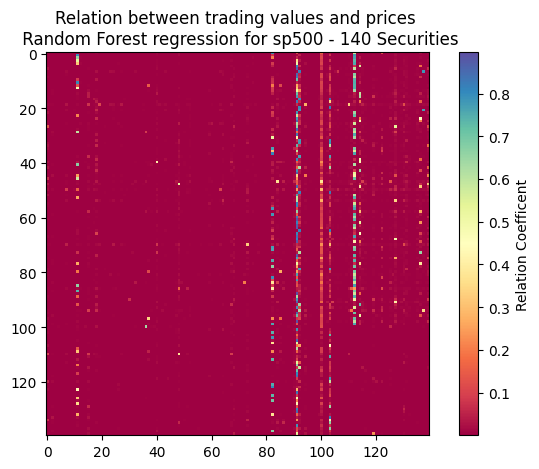

In [ ]:
complete_result
plt.imshow(complete_result, cmap='Spectral', interpolation='none')
plt.colorbar(label='Relation Coefficent')
plt.title("Relation between trading values and prices \n Random Forest regression for sp500 - 140 Securities")

# Show the plot
plt.tight_layout()